# Calculating the Experimental value of e/m using weighted and unweighted least squares fit lines.

For this assignment I will be calculating the experimental value of the mass to charge ration of an electron via two methods:
* an unweighted least-squares fit
* a weighted least-squares fit that considers uncertainties in the readings.

This will be done using data from a student experiment similar to an experiment first performed in 1897 by J.J. Thomson. The student experiment consists of a cathode ray tube used to accelerate elctrons to a voltage V. A magnetic field  $ B=1.28 \pm 0.01 \times10^{-3} Tesla $ is then used to bend the beam into a circular path. A ruler was used to measure the radius of the circular orbit. However this proved to be difficult and produced large uncertainties. As a result of distraction, for two of the readings, the ruler was misread and so these data points have a much larger uncertainty.

After calculating two values for e/m, one from each plot, I will compare these values to the accepted value of e/m which is $(1.75882002 \pm 0.00000001)\times 10^{11} C/Kg $ and see which is the most accurate.

# Theory
To find e/m from our data we need to rearrange the equations:

Equation (1):
$$ F_r = evB = \frac{mv^2}{r}$$

Equation (2):
$$  \frac{1}{2} m v^2 = e V $$

These need to be put into a form that includes e/m, V and r and can be plotted as a straight line.

From $  \frac{1}{2} m v^2 = e V $ we can get: 
$$ v= \sqrt{2V\frac{e}{m}} $$
substituting this into $ F_r = evB = \frac{mv^2}{r} $ and rearranging for r we get:
$$ r=\sqrt{V}\frac{\sqrt{2\frac{m}{e}}}{B}$$
This is in the form $ y=mx+c $. Where $r$ is on the x-axis and $\sqrt{V}$ is on the y-axis.

According to this equation the graph should not have an intercept on the y-axis, and so should pass through the origin, and the gradient should be equal to $ \frac{\sqrt{2\frac{m}{e}}}{B} $.

Below I will import numpy and the matplotlib pyplot module. Without %matplotlib notebook, a graph will not be plotted in the notebook.

In [1]:
import numpy as np #import numpy
from numpy import sqrt # import square route
import matplotlib.pyplot as plt #import matplotlib.pyplot
%matplotlib notebook

Next I will import the data for this session using the np.loadtxt function. Within this function I included unpack=True, to put each column into a seperate array, and delimiter=',', to tell the notebook that each data point is seperated by a comma in the csv file. I then added a print function so that the data would print below the cell and used this function to label the x and y data to make the output more understandable.

In [2]:
#unpack=True unpacks each column into a separate array.
# delimiter=',' tells the notbook that the data points are seperated by ','
Vdata, rdata, runcertainty = np.loadtxt("eovermdata2017.csv", unpack=True, delimiter=',') 

print("our V data is: ", Vdata, "[V]") 
print("our r data is:", rdata, "[m]")
print("our uncertainty in r is:", runcertainty, "[m]")

#printing data

our V data is:  [ 160.  180.  200.  220.  240.  260.  280.  300.] [V]
our r data is: [ 0.0338  0.0338  0.0355  0.0398  0.041   0.0423  0.0438  0.045 ] [m]
our uncertainty in r is: [ 0.002  0.01   0.01   0.002  0.002  0.002  0.002  0.002] [m]


Now I will label my data to make it easier to plot and change my $V$ data to $\sqrt{V} $. I will also calculate the means of my x and y data along with the slope and intercept.

In [3]:
## Fitting the data
ydata = rdata
yuncertainty = runcertainty
xdata = np.sqrt(Vdata)
mean_x = np.mean(xdata)
mean_y = np.mean(ydata)
slope = np.sum((xdata - mean_x)*ydata) / np.sum((xdata - mean_x)*xdata)
intercept = mean_y - slope*mean_x
sum_of_squares = np.sum((ydata - slope*xdata - intercept)**2)

# Unweighted least squares fit line

Below I will calculate the gradient (m), the intercept (c), the uncertainty in m and the uncertainty in c for the unweighted least squares fit line using the equations:


Equation (3):
$$ m = \frac{\sum(x_i - \bar{x}) y_i}{\sum (x_i - \bar{x})^2} = \frac{\sum x_i (y_i - \bar{y})}{\sum x_i (x_i - \bar{x})}; $$

Equation (4):
$$ c = \bar{y} - m \bar{x} $$

Equation (5):
$$ \Delta m \approx \sqrt{\frac{1}{D} \frac{\sum d_i^2}{(n - 2)}} $$

Equation (6):
$$ \Delta c \approx \sqrt{\Bigl(\frac{1}{n}+ \frac{\bar{x}^2}{D}\Bigl) \frac{\sum{d_i^2}}{(n-2)}} $$

In [4]:
m1 = (np.sum((xdata- mean_x)*ydata)/(np.sum((xdata-mean_x)**2))) #claculating gradient (m1)
print("gradient of unweighted least square fit line =", m1, "[m/V^(1/2)]")

c1 = mean_y - (m1 * mean_x) # calculating intercept (c1)
print("intercept of unweighted least square fit line =", c1, "[m]")

n = len(xdata) # setting n to equal the number of pairs of data points

d1 = ydata - m1*xdata - c1 # calculating deviation

D = np.sum((xdata - mean_x)**2) # calculating D

delta_m1 = sqrt((1/D)*(np.sum(d1**2)/(n-2))) # calculating uncertainty in m1
print("gradient of unweighted least square fit line uncertainty =", delta_m1, "[m/V^(1/2)]")

delta_c1 = sqrt(((1/n)+(mean_x**2/D))*((np.sum(d1**2))/(n-2))) # calculating the uncertainty in c1
print("intercept of unweighted least square fit line uncertainty =", delta_c1, "[m]")

gradient of unweighted least square fit line = 0.00268366818589 [m/V^(1/2)]
intercept of unweighted least square fit line = -0.00111826831366 [m]
gradient of unweighted least square fit line uncertainty = 0.000223729727545 [m/V^(1/2)]
intercept of unweighted least square fit line uncertainty = 0.00339302931421 [m]


# Weighted least squares fit line

Below I will calculate the gradient (m), the intercept (c), the uncertainty in m and the uncertainty in c for the weighted least squares fit line using the equations:
Equation (7): 
$$ w_i = \frac{1}{(\Delta y_i)^2} $$

Equations (8,9): 
$$  m = \frac{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_i
y_i}{\sum_i w_i \sum_i w_i x_i^2 - \left(\sum_i w_i x_i \right)^2}\\
= \frac{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_i
y_i}{\delta} $$
    
Equation (10):
$$ c = \frac{\sum_i w_i x_i^2 \sum_i w_i y_i - \sum_i w_i x_i \sum_i w_i x_i y_i}{\delta} $$

Equation (11):
$$ \delta = \sum_i w_i \sum_i w_i x_i^2 - \left(\sum_i w_i x_i \right)^2 $$

Equation (12): 
$$ \Delta m = \sqrt{ \frac{\sum_i w_i}{\delta}} $$

Equation (13):
$$ \Delta c = \sqrt{ \frac{\sum_i x_i^2 w_i}{\delta}} $$


In [5]:
w= 1/(yuncertainty)**2 #taking relative sizes of error bars into account by proportionally weighting them. w= weight for each point

d2= np.sum(w)*np.sum(w*(xdata**2))-(np.sum(w*xdata))**2 #calculating the denominator of equations 8 and 9

m2= (np.sum(w)*np.sum(w*xdata*ydata)-np.sum(w*xdata)*np.sum(w*ydata))/d2 #calculating the gradient of the weighted least squares fit line
print("gradient of weighted least squares fit line =", m2, "[m/V^(1/2)]") # print m2

c2= (np.sum(w*(xdata**2))*np.sum(w*ydata)-np.sum(w*xdata)*np.sum(w*xdata*ydata))/d2 # calculating the intercept of the least squares fit line
print("intercept of weighted least squares fit line =", c2, "[m]") #print c2

delta_m2= np.sqrt(np.sum(w)/d2) #calculating the uncertainty in the gradient of the least squares fit line
print("gradient of weighted least squares fit line uncertainty =", delta_m2, "[m/V^(1/2)]") #print delta_m2

delta_c2= np.sqrt(np.sum((xdata**2)*w)/d2) #calculating the uncertainty in the intercept of the least squares fit line
print("intercept of weighted least squares fit line uncertainty =", delta_c2, "[m]") #print delta_c2

gradient of weighted least squares fit line = 0.00240464507514 [m/V^(1/2)]
intercept of weighted least squares fit line = 0.00358956688078 [m]
gradient of weighted least squares fit line uncertainty = 0.000533651140173 [m/V^(1/2)]
intercept of weighted least squares fit line uncertainty = 0.00831248938794 [m]


Next I will plot the points, the unweighted least squares fit line and the weighted least squares fit line for:
$$ r=\sqrt{V}\frac{\sqrt{2\frac{m}{e}}}{B}$$

<IPython.core.display.Javascript object>


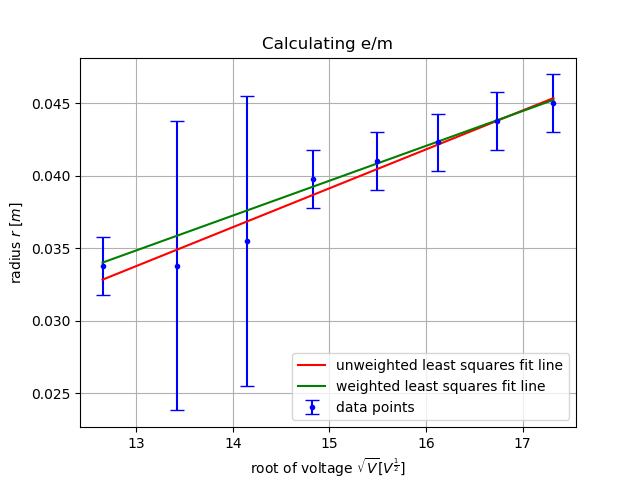

unweighted gradient is (0.0027 +/- 0.0002)[m/V^(1/2)] to 4 decimal places; unweighted intercept is (-0.001 +/- 0.003)[m] to 3 decimal places.
weighted gradient is (0.0024 +/- 0.0005)[m/V^(1/2)] to 4 decimal places; weighted intercept is (0.004 +/- 0.008)[m] to 3 decimal places.


In [6]:
plt.figure()
plt.errorbar(xdata,ydata,yerr=yuncertainty,capsize=5, fmt='b.', label= 'data points') #plotting points with error bars
plt.title('Calculating e/m') # Creating title for graph
plt.xlabel('root of voltage $\sqrt{V} [V^{\\frac{1}{2}}]$') # labelling x-axes
plt.ylabel('radius $r$ $[m]$') # labelling y-axes
plt.grid(True)  # Add gridlines

y1 = m1*xdata + c1 #stating the unweighted line so I can use y to plot the line
plt.line, = plt.plot(xdata, y1, 'r-', label="unweighted least squares fit line") #Plotting the unweighted least squares fit line

y2 = m2*xdata + c2 #stating the weighted line so I can use y to plot the line
plt.line, = plt.plot(xdata, y2, 'g-', label="weighted least squares fit line") #Plotting the unweighted least squares fit line

plt.legend(loc="best") #location for legend

print("unweighted gradient is ({0:0.4f} +/- {1:0.4f})[m/V^(1/2)] to 4 decimal places; unweighted intercept is ({2:0.3f} +/- {3:0.3f})[m] to 3 decimal places.".format(m1, delta_m1, c1, delta_c1))
print("weighted gradient is ({0:0.4f} +/- {1:0.4f})[m/V^(1/2)] to 4 decimal places; weighted intercept is ({2:0.3f} +/- {3:0.3f})[m] to 3 decimal places.".format(m2, delta_m2, c2, delta_c2))

# Calculation of e/m for the unweighted least squares fit line.
The gradient of the unweighted least squares fit line $(m_1)$ is equal to $ \frac{\sqrt{2\frac{m}{e}}}{B}$.

Rearanging this I can get the equation:
$$ \frac{e}{m} = \frac{2}{m_1^{2}B^{2}} $$

In [12]:
B= 0.00128 # defining B
delta_B= 0.00001 # defining delta_B - the uncertainty in B
em1= 2/((m1)**2*B**2) #calculating e/m
delta_em1= em1*np.sqrt((2*delta_B)**2+(2*delta_m1)**2)
print("The mass to charge ratio for the unweighted least squares fit line is:", em1, "[C/Kg]")
print("The uncertainty in the mass to charge ratio for the unweighted least squares fit line is:", delta_em1, "[C/Kg]")

The mass to charge ratio for the unweighted least squares fit line is: 169493255281.0 [C/Kg]
The uncertainty in the mass to charge ratio for the unweighted least squares fit line is: 75917079.8893 [C/Kg]


# Calculation of e/m for the weighted least squares fit line.
The gradient of the weighted least squares fit line $(m_2)$ is equal to $ \frac{\sqrt{2\frac{m}{e}}}{B}$.

Rearanging this I can get the equation:
$$ \frac{e}{m} = \frac{2}{m_2^{2}B^{2}} $$

In [13]:
#B and delta_B already defined when calculating e/m for the unweighted line.
em2= 2/((m2)**2*B**2) #calculating e/m
delta_em2= em2*np.sqrt((2*delta_B)**2+(2*delta_m2)**2)
print("The mass to charge ratio for the weighted least squares fit line is:", em2, "[C/Kg]")
print("The uncertainty in the mass to charge ratio for the weighted least squares fit line is:", delta_em2, "[C/Kg]")

The mass to charge ratio for the weighted least squares fit line is: 211109651566.0 [C/Kg]
The uncertainty in the mass to charge ratio for the weighted least squares fit line is: 225357368.533 [C/Kg]


# References